In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

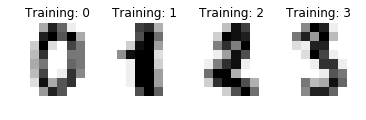

In [15]:
# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [35]:
# Load data from https://www.openml.org/d/554
X, y = digits.images, digits.target
# Flatten 2D images into single vector to be processed by the neural network
X = [x.flatten() for x in X]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Model

In [48]:
class NN():
    def __init__(self, n_layers=1, units=[100], n_features=10, n_classes=2):
        self.n_layers = n_layers
        self.activation = self.sigmoid
        
        self.W = [np.zeros((units[0], n_features))]
        self.W += [np.zeros((units[i], units[i-1])) for i in range(1, n_layers)]
        self.W.append(np.zeros((n_classes, units[n_layers-1])))
        
    def sigmoid(self, x):
        return 1 / (1 + np.e ** -x)
    
    def softmax(self, x):
        """Compute softmax values for each sets of scores in x."""
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)
        
    def fc_layer(self, x, W, activation):
        H = activation(np.matmul(W, x))
        
        return H
    
    def forward_pass(self, x):
        for i in range(self.n_layers):
            x = self.fc_layer(x, self.W[i], self.activation)
            
        x = np.matmul(self.W[-1], x)
        o = self.softmax(x)
        return o
    
    def train(self, X, y):
        loss = 0
        for i, x in enumerate(X):
            o = self.forward_pass(x)
            print("output: {}".format(o))
            y_pred = np.argmax(o)
            print("y_pred: {}".format(y_pred))
            loss += -np.log(o[y[i]])
        print("Loss: {}".format(loss))

In [51]:
nn = NN(n_layers=1, units=[50], n_features=64, n_classes=10)
nn.train(X_train, y_train)

output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1

output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1

output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1

output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1

output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y_pred: 0
output: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1

In [47]:
y

array([0, 1, 2, ..., 8, 9, 8])